<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Linear Regression Review Lab

_Authors: Alexander Combs (NYC)_

---

In [1]:
import numpy as np
import pandas as pd

### Create a Python dictionary 

- Use the following as the keys: 'X' and 'Y'
- Create two lists to use as the values in the dictionary: <br>
    for 'X': 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 <br>
    for 'Y': .5, .7, .8, .99, 1, 1.4, 1.8, 2.1, 2.4, 2.9

In [2]:
# Create list for X values
X = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
X 

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [3]:
# Create list for Y values
Y =[.5, .7, .8, .99, 1, 1.4, 1.8, 2.1, 2.4, 2.9]
Y

[0.5, 0.7, 0.8, 0.99, 1, 1.4, 1.8, 2.1, 2.4, 2.9]

In [4]:
# Create a list of list for X and Y values 
data = [list(a) for a in zip(X, Y)]
data

[[1, 0.5],
 [2, 0.7],
 [3, 0.8],
 [4, 0.99],
 [5, 1],
 [6, 1.4],
 [7, 1.8],
 [8, 2.1],
 [9, 2.4],
 [10, 2.9]]

In [5]:
# Create the headers
header = ['X', 'Y']
header

['X', 'Y']

In [6]:
# Create a dictionary 
dict = {}
for index, column_name in enumerate(header):
    dict[column_name] = []
    for row in data:
        dict[column_name].append(row[index])
dict

{'X': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'Y': [0.5, 0.7, 0.8, 0.99, 1, 1.4, 1.8, 2.1, 2.4, 2.9]}

### Using that dictionary, create a pandas DataFrame and call it pre_df

In [7]:
# convert the dictionary into a DataFrame
pre_df = pd.DataFrame(dict)
pre_df

,X,Y
0,1,0.50
1,2,0.70
2,3,0.80
3,4,0.99
4,5,1.00
5,6,1.40
6,7,1.80
7,8,2.10
8,9,2.40
9,10,2.90


### Using the Series from the DataFrame, create two new series

- The first list should use the 'X' values and add 10 to each value
- The second list should use the 'Y' values and add 3 to each
- Add those new lists to a new DataFrame and save it as new_data (hint: zip())

Note: the original DataFrame should be unchanged (don't save to pre_df as new columns)

In [8]:
# ceate a series for X + 10
series_X = pre_df.X
X_plus_10 = series_X + 10
X_plus_10

0    11
1    12
2    13
3    14
4    15
5    16
6    17
7    18
8    19
9    20
Name: X, dtype: int64

In [9]:
# create a series for Y + 3
series_Y = pre_df.Y
Y_plus_3 = series_Y + 3
Y_plus_3

0    3.50
1    3.70
2    3.80
3    3.99
4    4.00
5    4.40
6    4.80
7    5.10
8    5.40
9    5.90
Name: Y, dtype: float64

In [10]:
# Combine the two series into a new data frame and set column header labels
new_data = X_plus_10.to_frame().join(Y_plus_3)
new_data.columns = ['X_plus_10','Y_plus_3']
new_data

,X_plus_10,Y_plus_3
0,11,3.50
1,12,3.70
2,13,3.80
3,14,3.99
4,15,4.00
5,16,4.40
6,17,4.80
7,18,5.10
8,19,5.40
9,20,5.90


### Using pd.concat, vertically concat the new DataFrame, new_data, to the original pre_df DataFrame. Save it as df.

Hint: Be mindful of your column names, and make sure your index is 0-based and continuous.

In [11]:
# concatenate the two dataframes
df = pd.concat([pre_df, new_data], axis=1)
df

,X,Y,X_plus_10,Y_plus_3
0,1,0.50,11,3.50
1,2,0.70,12,3.70
2,3,0.80,13,3.80
3,4,0.99,14,3.99
4,5,1.00,15,4.00
5,6,1.40,16,4.40
6,7,1.80,17,4.80
7,8,2.10,18,5.10
8,9,2.40,19,5.40
9,10,2.90,20,5.90


### Plot the df DataFrame using pandas + matplotlib

- Set the figure size to 12 wide and 6 height
- Add a title, 'X vs Y' to the plot
- Set the size of the markers to 50 and the color of the markers to black

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 14
plt.style.use("fivethirtyeight")

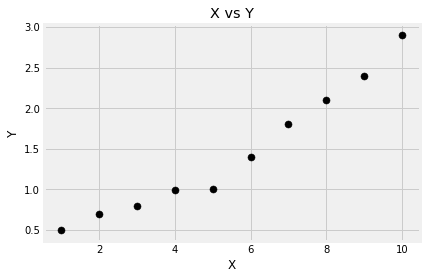

In [13]:
df.plot(kind='scatter', x='X', y='Y', alpha=1, s = 50, title = 'X vs Y', color = 'black');

### Using statsmodels, fit an OLS regression to your data and print our the summary

In [14]:
# Create X and y.
feature_cols = ['X']
X = df[feature_cols]
y = df.Y

In [15]:
# Check X's type.
print((type(X)))
print((type(X.values)))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [16]:
# Check y's type.
print((type(y)))
print((type(y.values)))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [17]:
# Check X's shape (n = number of observations, p = number of features).
print((X.shape))

(10, 1)


In [18]:
# Check y's shape (single dimension with length n).
# The comma indicates the datatype is a tuple.
print((y.shape))

(10,)


In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
# Make an instance of a LinearRegression object.
lr = LinearRegression()
type(lr)

sklearn.linear_model.base.LinearRegression

## Using the model you fitted, answer the folowing questions:

### What is the R-squared for the model?

In [21]:
lr.fit(X, y).score(X, y)

0.9496906608906868

### What is the p-value for your X?

In [22]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X = df.X
y = df.Y

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     151.0
Date:                Mon, 27 Jan 2020   Prob (F-statistic):           1.79e-06
Time:                        18:01:52   Log-Likelihood:                 3.4363
No. Observations:                  10   AIC:                            -2.873
Df Residuals:                       8   BIC:                            -2.268
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0313      0.131      0.239      0.8

/Users/hanhuang/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/hanhuang/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [23]:
# What is the p-value for your X?
print('p value = 0.025')

p value = 0.025


### What is the intercept?

In [24]:
X_0 = [[0]]
lr.predict(X_0)

array([0.03133333])

### Using the above, write the equation for our model

In [25]:
lr.coef_

array([0.25957576])

In [26]:
print('y = .2596X + 0.03133')

y = .2596X + 0.03133


### Solve the equation for an x of 20 then 21 (by hand/calculator)

In [27]:
# Solving 'by hand' for x = 20
X_20 = 20
y_20 = float(lr.coef_)*X_20 + float(lr.predict(X_0))
y_20

5.222848484848484

In [28]:
# Solving 'by hand' for x = 21
X_21 = 21
y_21 = float(lr.coef_)*X_21 + float(lr.predict(X_0))
y_21

5.482424242424241

### Using the predict functionality of statsmodels, predict the values for 20 and 21

Hint: You'll need to use a list - don't forget your intercept!

In [29]:
X_new = [[20], [21]]
lr.predict(X_new)

array([5.22284848, 5.48242424])

### Get the SSE by using the predictions for every X (y_hats) and the true y values

In [30]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import csv

# Define a function that accepts a list of features and returns testing RMSE.
def train_test_rmse(df, feature_cols):
    X = df[feature_cols]
    y = df.Y
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_pred = linreg.predict(X_test)
    #residual_arr = [[y_test], [y_pred]]
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))#, residual_arr

In [31]:
# RSME for all values of X 
print(train_test_rmse(df, ['X']))

0.2463105806411456


In [32]:
# Other RSMEs
print(train_test_rmse(df, ['X', 'X_plus_10', 'Y_plus_3']))
print(train_test_rmse(df, ['X_plus_10']))
print(train_test_rmse(df, ['Y_plus_3']))

1.667799874389512e-15
0.2463105806411457
1.0571437693441229e-15


### Now plot your predictions for every X

- Plot the predictions as a line and the true y values using a scatterplot

In [33]:
X_new = [[1],[2],[3],[4],[5],[6],[7],[8],[9]]
lr.predict(X_new)

array([0.29090909, 0.55048485, 0.81006061, 1.06963636, 1.32921212,
       1.58878788, 1.84836364, 2.10793939, 2.36751515])

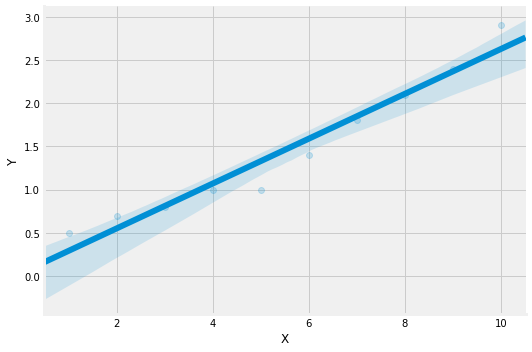

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
# Seaborn scatterplot with regression line
sns.lmplot(x='X', y='Y', data=df, aspect=1.5, scatter_kws={'alpha':0.2});

### Import PolynomialFeatures from sklearn. Then do the following:

- Instantiate a PolynomialFeatures object and save it as poly
- Documentation is [here](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)
- Use degree=5 (Hint: If that gives you more than 6 columns, you forgot to remove something)
- Use fit_transform on X to create a numpy array of polynomial features
- Save that array as poly_feats
- Convert this array to a DataFrame and save it as poly_X
- Join this new poly_df DataFrame with df['Y'] using pd.merge (Hint: join on the index)
- Save this joined index as pdf

In [35]:
# Extract values of X
print (X)
print(X.shape)
X = X.values

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: X, dtype: int64
(10,)


In [36]:
# Convert into an array
X

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [37]:
# Check type of Y
print(np.asarray(Y))
print(type(np.asarray(Y)))
print(np.asarray(Y).shape)

[0.5  0.7  0.8  0.99 1.   1.4  1.8  2.1  2.4  2.9 ]
<class 'numpy.ndarray'>
(10,)


In [38]:
# convert Y into an array and convert into y2 for use in the Polynomial Feature model
y2 = np.asarray(Y)
y2

array([0.5 , 0.7 , 0.8 , 0.99, 1.  , 1.4 , 1.8 , 2.1 , 2.4 , 2.9 ])

In [39]:
# Try and create a  model for X and y2
# I ran out of time to get this to work
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y2)

ValueError: Expected 2D array, got 1D array instead:
array=[ 1  2  3  4  5  6  7  8  9 10].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [40]:
# Test out PolynomialFeatures code
# I ran out of time in getting this to work
from sklearn.preprocessing import PolynomialFeatures  
poly_features = PolynomialFeatures(degree = 3)  
X_poly = poly_features.fit_transform(X)
poly_model = LinearRegression()  
poly_model.fit(X_poly, y2)

pred = poly_model.predict(X_poly)
new_X, new_y = zip(*sorted(zip(X, pred))) # sort values for plotting
plt.plot(new_X, new_y)
plt.scatter(X,y2)
plt.title("Polynomial Degree = 3")

ValueError: Expected 2D array, got 1D array instead:
array=[ 1  2  3  4  5  6  7  8  9 10].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [41]:
# Convert this array to a DataFrame and save it as poly_X

In [42]:
# Join this new poly_df DataFrame with df['Y'] using pd.merge (Hint: join on the index)

In [43]:
# Save this joined index as pdf

### Using statsmodels as before, fit this new model and save it as poly_results

In [44]:
# A:  UNABLE TO DO REMAINING TASKS AS I COULDN'T GET POLYNOMIAL FEATURES TO WORK

### Print out the model's predictions and save them as poly_yhat

In [21]:
# A:

### Calculate the SSE

In [22]:
# A:

### Now, create a for loop that does the follow:

- Iterates over the following alpha values [0, .001, .01, .25, .5, 1, 10]
- In each loop, you are going to fit a regularized regression
- See [Statsmodels Docs](http://statsmodels.sourceforge.net/devel/generated/statsmodels.regression.linear_model.OLS.fit_regularized.html) to understand how to do this
- In each loop, set the value of alpha to the value of being iterated over
- Set the L1_wt parameter to 0
- In each loop print out the alpha value, the SSE, and the mean absolute value of the coefficient of the model
- You should also print out the predictions as a line and the true y's as a scatterplot as above

In [23]:
# A:

### Using the output of the above, answer the following:
- What happens to the SSE over the increasing alpha values?
- What happens to the mean abs. value of the coefficients?
- Does increasing the bias to reduce variance always mean a better model?

In [24]:
# A:

In [25]:
# A:

In [26]:
# A: